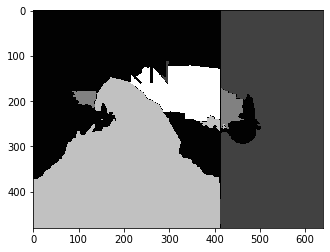

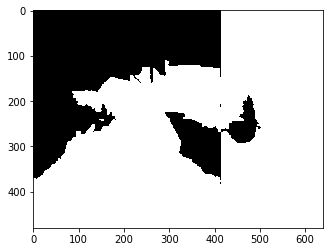

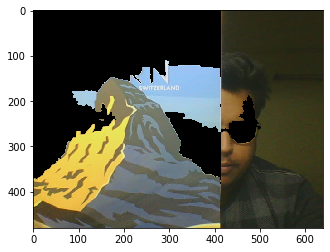

In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("my.jpg", 3)

# Create a blank image of zeros (same dimension as img)
# It should be grayscale (1 color channel)
marker = np.zeros_like(img[:,:,0]).astype(np.int32)

# This step is manual. The goal is to find the points
# which create the result we want. I suggest using a
# tool to get the pixel coordinates.

# Dictate the background and set the markers to 1
marker[204][95] = 1
marker[240][137] = 1
marker[245][444] = 1
marker[260][427] = 1
marker[257][378] = 1
marker[217][466] = 1

# Dictate the area of interest
# I used different values for each part of the car (for visibility)
marker[235][370] = 255    # car body
marker[135][294] = 64     # rooftop
marker[190][454] = 64     # rear light
marker[167][458] = 64     # rear wing
marker[205][103] = 128    # front bumper

# rear bumper
marker[225][456] = 128
marker[224][461] = 128
marker[216][461] = 128

# front wheel
marker[225][189] = 192
marker[240][147] = 192

# rear wheel
marker[258][409] = 192
marker[257][391] = 192
marker[254][421] = 192

# Now we have set the markers, we use the watershed
# algorithm to generate a marked image
marked = cv2.watershed(img, marker)

# Plot this one. If it does what we want, proceed;
# otherwise edit your markers and repeat
plt.imshow(marked, cmap='gray')
plt.show()

# Make the background black, and what we want to keep white
marked[marked == 1] = 0
marked[marked > 1] = 255

# Use a kernel to dilate the image, to not lose any detail on the outline
# I used a kernel of 3x3 pixels
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(marked.astype(np.float32), kernel, iterations = 1)

# Plot again to check whether the dilation is according to our needs
# If not, repeat by using a smaller/bigger kernel, or more/less iterations
plt.imshow(dilation, cmap='gray')
plt.show()

# Now apply the mask we created on the initial image
final_img = cv2.bitwise_and(img, img, mask=dilation.astype(np.uint8))

# cv2.imread reads the image as BGR, but matplotlib uses RGB
# BGR to RGB so we can plot the image with accurate colors
b, g, r = cv2.split(final_img)
final_img = cv2.merge([r, g, b])

# Plot the final result
plt.imshow(final_img)
plt.show()